<a href="https://colab.research.google.com/github/AfrinDange/MachineLearningInPython/blob/main/data_preprocessing/data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries
* numpy : works with arrays
* matplotlib : for graphs
* pandas : import and create matrix and vector for dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt # with "." we access the particular module pyplot
import pandas as pd

## Importing the dataset
For Machine Learning always, segregate your dataset into features and the dependent variables.

- import dataset
- make the respective entities of features and independent variables

In [3]:
url = 'https://raw.githubusercontent.com/AfrinDange/MachineLearningInPython/main/data_preprocessing/Data.csv'
dataset = pd.read_csv(url)   # creates a dataframe

# features
x = dataset.iloc[:, :-1].values   # iloc locates the indices provided
                                  # ":" all rows considered
# dependent variable                        
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data
Ways to do:
1. Delete the whole observation
2. Replace the missing value with average of all obserations made for that variable (mean, median or mode)

Scikit-learn library is  used to handle missing data

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:3])   # Include all numerical columns only
                        # connects impute to our feature matrix
x[:,1:3] = imputer.transform(x[:,1:3])   # updates all missing values

In [7]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data
Encoding categorical data as 0,1,2 . . . may lead to misinterpretation of data by the model. Therefore, we replace the categorical data column to n columns (n is the number of categories) and create a binary vector 0,1 to denote if the observation belongs to the category or not.

This is called as one hot encoding.

**NOTE:** The columns created here are known as dummy variables

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))   # Convert the output to numpy array  

In [9]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Independent Variable

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y) # independent variable does not have to be a numpy array

In [12]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set
* Training set: to train the model
* Test set: to evaluate the model



In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)    # random_state sets the seed

In [14]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [15]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [16]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [17]:
print(y_test)

[0 1]


## Feature Scaling
* It is done to avoid the domination of certain features over others.
* It is applied only for certain machine learning models.
* It is not applied on dummy variables. [cateogorical data]
* **The correct way of using feature scaling is to apply it after dividing the dataset into test and train.**


There are two ways to apply feature scaling:

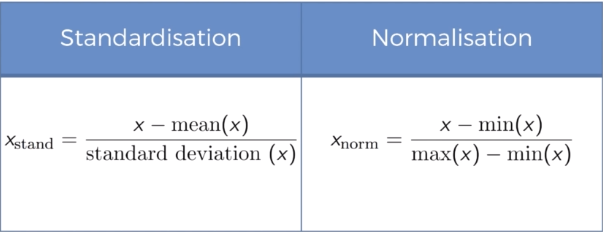

Standardisation: 
* When applied, all values will be converted to a value in range of -3 to +3
* Recommended for any type of features

Normalization:
* When applied, all values will be converted to a value in range of 0 to +1
* Recommended when features follow normal distribution

When performing scaling, the parameters (mean and standard deviation) are calculated for training set only, and then the formula is applied on training set. Using the same (previously calculated parameters from the training set) parameters, we apply feature scaling on the test set.


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train[:,3:] = sc.fit_transform(x_train[:,3:]) #fit scales and transform changes the values
x_test[:,3:] = sc.transform(x_test[:,3:]) # use the same object so that the scaler values don't change

In [19]:
print(x_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [20]:
print(x_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
